# Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


%matplotlib inline

In [2]:
tf.__version__

'2.14.0'

## Downloading data from UCI ML Repo

The dataset which we are using in this demo is taken from UCI ML repo. Here we are directly pulling data from repo. I have also added the same dataset in data directory of this git repo.

https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
combined_cycle_power_plant = fetch_ucirepo(id=294) 
  
# data (as pandas dataframes) 
X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets 
  
# metadata 
print(combined_cycle_power_plant.metadata) 
  
# variable information 
print(combined_cycle_power_plant.variables) 

{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'authors': 'Pınar Tüfekci', 'publ

In [4]:
X.shape

(9568, 4)

In [5]:
display(X)

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [6]:
display(y)

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


In [7]:
X.describe()

,AT,V,AP,RH
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978
std,7.452473,12.707893,5.938784,14.600269
min,1.810000,25.360000,992.890000,25.560000
25%,13.510000,41.740000,1009.100000,63.327500
50%,20.345000,52.080000,1012.940000,74.975000
75%,25.720000,66.540000,1017.260000,84.830000
max,37.110000,81.560000,1033.300000,100.160000


## Writing data for futureusages



In [8]:
import os

def create_dir(d):
    if not os.path.exists(d):
        os.mkdir(d) 

In [9]:
# cpp -> cycle power plant

outdir = '../../data/combined_cycle_power_plant/'
create_dir(outdir)

from pathlib import Path
target_path = Path(outdir)
combined_cpp_df = pd.concat([X,y], axis=1)
combined_cpp_df.to_csv(target_path / 'data.csv', index=False, header=True)

# Split training test data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.iloc[:, -1].values, test_size=0.2, random_state=2024
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2024
)

# Building the model

## Design the model

In [11]:
tf.random.set_seed(2024)
tf.keras.backend.clear_session()

hidden_layer1 = tf.keras.layers.Dense(6, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(6, activation="relu")

output_layer = tf.keras.layers.Dense(1) # no activation in output layer as its a regression problem


ann = tf.keras.models.Sequential(
    [
        hidden_layer1,
        hidden_layer2,
        output_layer
    ]
)

## Compile the model

In [12]:
ann.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Print the model

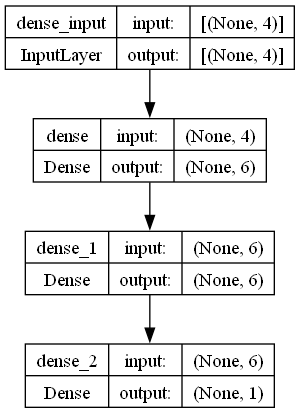

In [21]:
imdir = '../../images/models/'
create_dir(imdir)
tf.keras.utils.plot_model(ann,imdir+'/combined_cycle_power_plant_nonorm.png', show_shapes=True)

## Train the model

In [15]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_valid,y_valid))

Epoch 1/50
192/192 [==============================] - 3s 6ms/step - loss: 27139.9102 - root_mean_squared_error: 164.7419 - val_loss: 170.4467 - val_root_mean_squared_error: 13.0555
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 155.2149 - root_mean_squared_error: 12.4585 - val_loss: 133.4607 - val_root_mean_squared_error: 11.5525
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 127.9204 - root_mean_squared_error: 11.3102 - val_loss: 109.5471 - val_root_mean_squared_error: 10.4665
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 103.6768 - root_mean_squared_error: 10.1822 - val_loss: 89.2620 - val_root_mean_squared_error: 9.4479
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 86.3900 - root_mean_squared_error: 9.2946 - val_loss: 75.8955 - val_root_mean_squared_error: 8.7118
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 76.6913 - root_mean_squared_error: 8.75

## Evaluate the model

In [16]:
y_pred = ann.predict(X_test)

y_pred

60/60 [==============================] - 0s 3ms/step


array([[471.02136],
       [482.48883],
       [436.01022],
       ...,
       [462.0199 ],
       [438.5201 ],
       [432.3065 ]], dtype=float32)

In [19]:
ann.evaluate(x=X_test, y= y_test)

60/60 [==============================] - 0s 2ms/step - loss: 22.3071 - root_mean_squared_error: 4.7230


[22.307140350341797, 4.723043441772461]

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[471.0213623  462.87      ]
 [482.48883057 492.26      ]
 [436.01022339 439.2       ]
 ...
 [462.01989746 454.4       ]
 [438.52011108 440.5       ]
 [432.30648804 439.11      ]]


# Building model with normalization

## Design the model

In [23]:
tf.random.set_seed(2025)
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(6, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(6, activation="relu")

output_layer = tf.keras.layers.Dense(1) # no activation in output layer as its a regression problem


ann_norm = tf.keras.models.Sequential(
    [
        norm_layer,
        hidden_layer1,
        hidden_layer2,
        output_layer
    ]
)

norm_layer.adapt(X_train)

## Compile the model

In [24]:
ann_norm.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Build the model

In [25]:
ann_norm.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_valid,y_valid))

Epoch 1/50
192/192 [==============================] - 2s 4ms/step - loss: 204736.3594 - root_mean_squared_error: 452.4780 - val_loss: 201747.4844 - val_root_mean_squared_error: 449.1631
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 196473.4375 - root_mean_squared_error: 443.2532 - val_loss: 188018.5781 - val_root_mean_squared_error: 433.6111
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 175306.8750 - root_mean_squared_error: 418.6966 - val_loss: 159131.9062 - val_root_mean_squared_error: 398.9134
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 139909.4688 - root_mean_squared_error: 374.0447 - val_loss: 118702.9062 - val_root_mean_squared_error: 344.5329
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 98430.0547 - root_mean_squared_error: 313.7357 - val_loss: 78773.5234 - val_root_mean_squared_error: 280.6662
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss

## Print the model

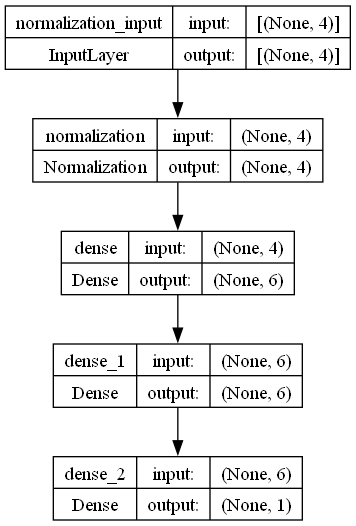

In [26]:
imdir = '../../images/models/'
create_dir(imdir)
tf.keras.utils.plot_model(ann_norm,imdir+'/combined_cycle_power_plant_norm.png', show_shapes=True)

In [27]:
ann_norm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 4)                 9         
 on)                                                             
                                                                 
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 88 (356.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


## Evaluate the model

In [28]:
ann_norm.evaluate(X_test,y_test)

60/60 [==============================] - 0s 2ms/step - loss: 20.6985 - root_mean_squared_error: 4.5496


[20.698453903198242, 4.54955530166626]

In [30]:
y_pred = ann_norm.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 4ms/step
[[465.6479187  462.87      ]
 [481.6100769  492.26      ]
 [432.64880371 439.2       ]
 ...
 [461.59802246 454.4       ]
 [440.324646   440.5       ]
 [432.09933472 439.11      ]]
